載入套件

In [1]:
import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

讀取客戶交易資料

In [2]:
customer_wkst = pd.read_excel("trading_data_all.xlsx", sheet_name='客戶')
trading_wkst = pd.read_excel("trading_data_all.xlsx", sheet_name='合併後交易資料')

每月交易次數以及總額

In [3]:
month_trading_record = pd.DataFrame(index=[i for i in range(12)], columns=['Month', 'Sum', "Trades"])
for i in range(12):
    month_trading_record.iloc[i]['Month'] = trading_wkst.columns[i+3]
    trading_wkst.iloc[:, i+3] = pd.to_numeric(trading_wkst.iloc[:, i+3], errors='coerce').fillna(0)
    month_trading_record.iloc[i]['Sum'] = sum(trading_wkst.iloc[:, i+3])
    num = 0
    for j in range(trading_wkst.shape[0]):
        if trading_wkst.iloc[j, i+3] > 0:
            num += 1
    month_trading_record.iloc[i]['Trades'] = num
month_trading_record

,Month,Sum,Trades
0,201801,1.01788e+06,64
1,201802,8.69014e+06,62
2,201803,2.53337e+06,62
3,201804,1.28042e+06,64
4,201805,541673,64
5,201806,630686,63
6,201807,1.13441e+06,64
7,201808,845630,59
8,201809,608677,60
9,201810,1.04105e+06,63


有交易的客戶名單

In [4]:
ID = trading_wkst.groupby("客戶")
customer_list = []
for key, value in dict(ID.size()).items():
    customer_list.append(key)
customer_list

['AA0102',
 'AA0263',
 'AA0329',
 'AA0557',
 'AA0809',
 'AA1049',
 'AA1935',
 'AA2293',
 'AA3139',
 'AA3312',
 'AA3880',
 'AA3947',
 'AA4199',
 'AA4200',
 'AA4372',
 'AA4905',
 'AA5297',
 'AA5706',
 'AA8077',
 'AA8766',
 'AA8857',
 'AA8978',
 'AA9107',
 'AA9132',
 'AA9175',
 'AA9875']

每個客戶的每月交易次數以及交易總額

In [5]:
ID_trades = pd.DataFrame(index=[ i for i in range(len(customer_list))], \
                         columns=["ID", "201801", "201802", \
                                  "201803", "201804","201805", "201806","201807", \
                                  "201808","201809", "201810", "201811", "201812",  \
                                  "Trades"])
ID_trades['ID'] = customer_list
for i in range(len(customer_list)):
    info = ID.get_group(customer_list[i])
    sum_year = 0
    for j in range(12):
        sum_month = 0
        for k in range(info.shape[0]):
            if info.iloc[k, j+3] > 0:
                sum_month += 1
        ID_trades.iloc[i, j+1] = sum_month
        sum_year += sum_month
    ID_trades.iloc[i, -1] = sum_year

ID_trades

,ID,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,Trades
0,AA0102,1,0,0,0,0,0,0,0,0,0,0,0,1
1,AA0263,7,6,4,4,4,4,4,4,4,4,1,0,46
2,AA0329,1,1,1,1,1,1,1,1,1,1,1,1,12
3,AA0557,5,4,5,5,5,5,3,3,4,4,3,4,50
4,AA0809,1,2,1,1,2,2,1,1,1,1,1,1,15
5,AA1049,8,9,9,10,10,11,11,10,10,10,10,10,118
6,AA1935,1,1,2,3,3,3,2,2,2,2,2,2,25
7,AA2293,0,1,0,0,0,0,1,0,0,0,0,0,2
8,AA3139,1,1,1,1,1,1,1,1,1,1,1,1,12
9,AA3312,0,0,0,1,0,0,0,0,0,0,0,0,1


In [6]:
ID_amount = pd.DataFrame(index=[ i for i in range(len(customer_list))], \
                         columns=["ID", "201801", "201802", \
                                  "201803", "201804","201805", "201806","201807", \
                                  "201808","201809", "201810", "201811", "201812",  \
                                  "Amount"])
ID_amount['ID'] = customer_list
for i in range(len(customer_list)):
    info = ID.get_group(customer_list[i])
    amount_year = 0
    for j in range(12):
        amount_month = 0
        for k in range(info.shape[0]):
            if info.iloc[k, j+3] > 0:
                amount_month += info.iloc[k, j+3]
        ID_amount.iloc[i, j+1] = amount_month
        amount_year += amount_month
    ID_amount.iloc[i, -1] = amount_year

ID_amount
#stats.mode(list(ID_amount.iloc[1, 1:13]))[0][0]

,ID,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,Amount
0,AA0102,20000,0,0,0,0,0,0,0,0,0,0,0,20000
1,AA0263,51000,7.518e+06,12000,12000,12000,12000,12000,12000,12000,17033,2e+06,0,9.67003e+06
2,AA0329,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,72000
3,AA0557,26000,37000,31000,26000,26000,26000,15000,38000,54000,69000,19000,20000,387000
4,AA0809,3000,6000,3000,3000,6000,6000,3000,3000,3000,3000,3000,3000,45000
5,AA1049,48000,60000,57000,84000,107000,165000,97000,142000,164000,276000,119000,132000,1.451e+06
6,AA1935,4000,4000,8000,124000,12000,12000,58000,12000,16000,20000,20000,20000,310000
7,AA2293,0,360000,0,0,0,0,120000,0,0,0,0,0,480000
8,AA3139,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,60000
9,AA3312,0,0,0,437535,0,0,0,0,0,0,0,0,437535


讀取客服聯繫紀錄

In [7]:
customer_service = pd.read_excel("customer_service_data.xlsx")

找出有交易的客戶的聯繫紀錄

In [8]:
name_list = []
for i in range(len(customer_service['Unique ID'])):
    if customer_service.iloc[i]['Unique ID'] in customer_list:
        name_list.append(i)
target_customer_service = customer_service.iloc[name_list]
target_customer_service = target_customer_service.reset_index(drop=True)
target_customer_service

,類別,Unique ID,資料日期,客戶事件描述
0,Call Out,AA0102,20180328 151853,推Q1，家庭戶
1,Call Out,AA0263,20180112 175257,有進線問IPO.但沒有要理專回電 用mail
2,Call Out,AA0263,20180123 135700,[ECP]IPO 美元 有機會
3,Call Out,AA0263,20180620 161329,已開ipo edm 再mail
4,Call Out,AA0263,20180724 175000,[ECP]可意買亞債
5,Call Out,AA0329,20180626 141600,[ECP] 手機本人，人不錯，庫存為新興高收債組合，說明中國境內債，似乎有意願，但現在比較忙...
6,Call Out,AA0329,20180705 174000,[ECP] 表示沒有收到書面的文宣，通訊地址是正確的，請我再寄一次，告知單筆20萬有零手續費...
7,Call Out,AA0329,20180710 144100,[ECP] 7/10 14:43手機本人，告知中國境內債週三開始募集，今日16:00可以交易...
8,Call Out,AA0329,20180718 173400,[ECP] 7/18 17:35手機終於聯繫上本人，提醒募集僅到7/19 16:00前喔，客...
9,Call Out,AA0329,20180719 143900,[ECP] 客戶還是沒下單，再次手機說明中國境內債募集僅到下午四點，客戶推說陸股跌很多，已說...


In [9]:
times = [i for i in range(len(customer_list))]
ID_contact = pd.DataFrame(index=times, \
                              columns=["ID", "201801", "201802","201803", "201804", \
                                       "201805", "201806","201807", "201808","201809", \
                                       "201810", "201811", "201812",  "Contact"])
for i in range(ID_contact.shape[0]):
    ID_contact.iloc[i,0] = customer_list[i]
    ID_contact.iloc[i, 1:] = 0

for i in range(target_customer_service.shape[0]):
    index = customer_list.index(target_customer_service.iloc[i][1])
    date = int(target_customer_service.iloc[i][2][4:6])
    ID_contact.iloc[index, -1] += 1
    ID_contact.iloc[index, date] += 1
ID_contact

,ID,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,Contact
0,AA0102,0,0,1,0,0,0,0,0,0,0,0,0,1
1,AA0263,2,0,0,0,0,1,1,0,0,0,0,0,4
2,AA0329,0,0,0,0,0,1,4,0,0,1,1,0,7
3,AA0557,0,0,1,0,0,0,0,1,0,0,0,1,3
4,AA0809,1,1,0,0,0,0,0,0,0,0,0,0,2
5,AA1049,0,1,0,1,0,1,0,0,0,0,1,0,4
6,AA1935,0,0,1,0,0,0,1,0,0,0,0,0,2
7,AA2293,0,1,0,0,0,1,2,0,1,0,0,0,5
8,AA3139,0,0,0,1,0,0,0,0,0,0,0,0,1
9,AA3312,0,0,2,0,1,1,0,0,0,0,0,2,6


客服與客戶年聯繫次數和年交易次數的相關係數及散佈圖

-0.11950848901654129


Text(0, 0.5, '年聯繫次數')

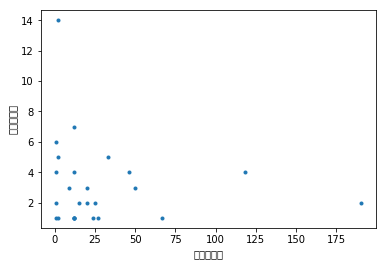

In [18]:
a = list(ID_trades['Trades'])
b = list(ID_contact['Contact'])
print(stats.pearsonr(a,b)[0])
plt.plot(a, b, '.')
plt.xlabel('年交易次數')
plt.ylabel('年聯繫次數')

客服與客戶年聯繫次數和年交易金額的相關係數及散佈圖

0.1643730750270507


Text(0, 0.5, '年聯繫次數')

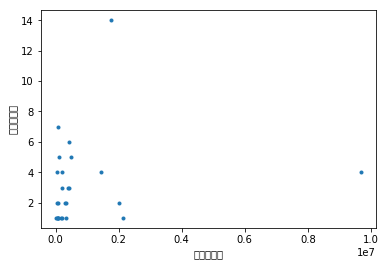

In [19]:
a = list(ID_amount['Amount'])
b = list(ID_contact['Contact'])
print(stats.pearsonr(a,b)[0])
plt.plot(a, b, '.')
plt.xlabel('年交易金額')
plt.ylabel('年聯繫次數')

客服與客戶月聯繫次數和月交易次數的相關係數

In [12]:
for i in range(12):
    a = list(ID_trades.iloc[:, i+1])
    b = list(ID_contact['Contact'])
    print(stats.pearsonr(a,b)[0])

-0.09126857759262404
-0.1134952604648121
-0.09152568627831185
-0.10914415836366008
-0.12416075732057469
-0.11903616068593324
-0.11434069207039366
-0.12235925050554393
-0.12235388032524444
-0.1415889683823664
-0.1343795097568743
-0.13595269506059804


客服與客戶月聯繫次數和月交易金額的相關係數

In [13]:
for i in range(12):
    a = list(ID_amount.iloc[:, i+1])
    b = list(ID_contact['Contact'])
    print(stats.pearsonr(a,b)[0])

0.6212296467779199
0.0616158094851367
0.7225131691208742
0.04634517965086908
-0.1255285332303724
-0.1189731400185912
-0.09937004587750635
-0.1798448434913616
-0.09756209031267506
-0.15185585923619274
0.052525285664208825
-0.11542240363085848


In [14]:
ID_amount

,ID,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,Amount
0,AA0102,20000,0,0,0,0,0,0,0,0,0,0,0,20000
1,AA0263,51000,7.518e+06,12000,12000,12000,12000,12000,12000,12000,17033,2e+06,0,9.67003e+06
2,AA0329,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000,72000
3,AA0557,26000,37000,31000,26000,26000,26000,15000,38000,54000,69000,19000,20000,387000
4,AA0809,3000,6000,3000,3000,6000,6000,3000,3000,3000,3000,3000,3000,45000
5,AA1049,48000,60000,57000,84000,107000,165000,97000,142000,164000,276000,119000,132000,1.451e+06
6,AA1935,4000,4000,8000,124000,12000,12000,58000,12000,16000,20000,20000,20000,310000
7,AA2293,0,360000,0,0,0,0,120000,0,0,0,0,0,480000
8,AA3139,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,60000
9,AA3312,0,0,0,437535,0,0,0,0,0,0,0,0,437535


找出每個ID突然交易的月交易金額以及月聯繫次數

In [15]:
ID_sudden_trade = ID_amount.copy()
for i in range(ID_sudden_trade.shape[0]):
    mode = stats.mode(list(ID_sudden_trade.iloc[i, 1:13]))[0][0]
    for j in range(12):
        if ID_sudden_trade.iloc[i, j+1] == mode:
            ID_sudden_trade.iloc[i, j+1] = 0
    ID_sudden_trade.iloc[i, -1] = sum(list(ID_sudden_trade.iloc[i, 1:13]))

sudden_trade_list = []
for i in range(ID_sudden_trade.shape[0]):
    times = 0
    for j in range(12):
        if ID_sudden_trade.iloc[i, j+1] != 0:
            times += 1
    if times <= 3:
        sudden_trade_list.append(i)
#delete column "Amount"
ID_sudden_trade = ID_sudden_trade.drop('Amount', 1)
ID_sudden_trade.iloc[sudden_trade_list]

,ID,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
0,AA0102,20000,0,0,0,0,0,0,0,0,0,0,0
2,AA0329,0,0,0,0,0,0,0,0,0,0,0,0
4,AA0809,0,6000,0,0,6000,6000,0,0,0,0,0,0
7,AA2293,0,360000,0,0,0,0,120000,0,0,0,0,0
8,AA3139,0,0,0,0,0,0,0,0,0,0,0,0
9,AA3312,0,0,0,437535,0,0,0,0,0,0,0,0
10,AA3880,0,71000,0,0,0,0,0,56000,0,40000,0,0
11,AA3947,0,0,0,0,0,0,0,0,0,0,0,0
12,AA4199,8000,8000,8000,0,0,0,0,0,0,0,0,0
13,AA4200,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
ID_contact.iloc[sudden_trade_list]

,ID,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,Contact
0,AA0102,0,0,1,0,0,0,0,0,0,0,0,0,1
2,AA0329,0,0,0,0,0,1,4,0,0,1,1,0,7
4,AA0809,1,1,0,0,0,0,0,0,0,0,0,0,2
7,AA2293,0,1,0,0,0,1,2,0,1,0,0,0,5
8,AA3139,0,0,0,1,0,0,0,0,0,0,0,0,1
9,AA3312,0,0,2,0,1,1,0,0,0,0,0,2,6
10,AA3880,0,0,0,0,0,0,0,0,1,0,0,0,1
11,AA3947,0,0,1,0,0,0,0,0,0,0,0,0,1
12,AA4199,0,0,2,2,1,0,0,0,0,0,0,0,5
13,AA4200,0,0,0,0,0,0,0,0,0,1,0,0,1


In [17]:
customer_worksheet = pd.read_excel("customer_service_data_20190418.xlsx", sheet_name='基本資料')
trading_worksheet = pd.read_excel("customer_service_data_20190418.xlsx", sheet_name='交易資料')
#customer_list = list(customer_worksheet[customer_worksheet['是否有交易'] == '有交易']['客戶編號'])
#trading_worksheet
id2id = {}
id2professional = {}
id2region = {}
id2age = {}
customer_trade_list = []
customer_no_trade_list = []
region_dic = {}
professional_dic = {}
for i in range(customer_worksheet.shape[0]):
    if customer_worksheet.iloc[i, 1] == "未開戶":
        break
    id2id[customer_worksheet.iloc[i, 0]] = customer_worksheet.iloc[i, 1]
    id2professional[customer_worksheet.iloc[i, 0]] = customer_worksheet.iloc[i, 4]
    id2region[customer_worksheet.iloc[i, 0]] = customer_worksheet.iloc[i, 2]
    id2age[customer_worksheet.iloc[i, 0]] = int(round(customer_worksheet.iloc[i, 3]/10))*10
    if customer_worksheet.iloc[i, 5] == "Y":
        customer_trade_list.append(customer_worksheet.iloc[i, 0])
    else:
        customer_no_trade_list.append(customer_worksheet.iloc[i, 0])
        continue
    if customer_worksheet.iloc[i, 2] not in region_dic:
        region_dic[customer_worksheet.iloc[i, 2]] = 1
    else:
        region_dic[customer_worksheet.iloc[i, 2]] += 1
    if customer_worksheet.iloc[i, 4] not in professional_dic:
        professional_dic[customer_worksheet.iloc[i, 4]] = 1
    else:
        professional_dic[customer_worksheet.iloc[i, 4]] += 1
#print(type(customer_worksheet.iloc[1, 3]))
customer_trade_list
region_dic
professional_dic

FileNotFoundError: [Errno 2] No such file or directory: 'customer_service_data_20190418.xlsx'

In [ ]:
id2cost = {}
for i in range(trading_worksheet.shape[0]):
    trading_worksheet.iloc[i, 2:] = pd.to_numeric(trading_worksheet.iloc[i, 2:], errors='coerce').fillna(0)
    tmp_cost = int(sum(trading_worksheet.iloc[i, 2:]))

    if trading_worksheet.iloc[i, 0] not in id2cost:
        id2cost[trading_worksheet.iloc[i,0]] = tmp_cost
    else:
        id2cost[trading_worksheet.iloc[i,0]] += tmp_cost
# plt.pie(list(professional_dic.values()) , labels = list(professional_dic.keys()),autopct='%1.1f%%')
# plt.show()
region2cost = {}
job2cost = {}
id_to_id_transpose = {}
for i in id2id:
    id_to_id_transpose[id2id[i]] = i

for i in id2cost:
    j = id_to_id_transpose[i]
    if id2region[j] not in region2cost:
        region2cost[id2region[j]] = id2cost[i]
    else:
        region2cost[id2region[j]] += id2cost[i]
    
    if id2professional[j] not in job2cost:
        job2cost[id2professional[j]] = id2cost[i]
    else:
        job2cost[id2professional[j]] += id2cost[i]
    
region2cost
#job2cost

In [ ]:
x = np.linspace(1, 7, 6)
y = np.linspace(1.3, 7.3, 6)
plt.figure(num=5,figsize=(8,5))
region_cost = [c*100/sum( list(region2cost.values())) for c in  list(region2cost.values())]
region_people = [c*100/sum( list(region_dic.values())) for c in  list(region_dic.values())]

plt.bar(x, region_cost, color='orange', width = 0.2,  tick_label = list(region2cost.keys()), label='交易金額')
plt.bar(y, region_people, color='blue', width = 0.2,  label='地區人數')
plt.legend()
plt.ylabel("百分比")
plt.xlabel("地區")

In [ ]:
x = np.linspace(1, 9, 8)
y = np.linspace(1.3, 9.3, 8)
plt.figure(num=5,figsize=(8,5))
job_cost = [c*100/sum(list(job2cost.values())) for c in list(job2cost.values())]
job_people = [c*100/sum(list(professional_dic.values())) for c in list(professional_dic.values())]

plt.bar(x, job_cost, color='orange', width = 0.2,  tick_label = list(job2cost.keys()), label='交易金額')
plt.bar(y, job_people, color='blue', width = 0.2,  label='職業人數')
plt.legend()
plt.ylabel("百分比")
plt.xlabel("職業")


In [ ]:
total_trade_list = customer_list
for i in customer_trade_list :
    if total_trade_list.count(i) == 0:
        total_trade_list.append(i)

#print(len(total_trade_list))
totalid2times = {}
for i in range(customer_service.shape[0]):
    if total_trade_list.count(customer_service.iloc[i, 1]) > 0:
        if customer_service.iloc[i, 1] not in totalid2times:
            totalid2times[customer_service.iloc[i, 1]] = 1
        else:
            totalid2times[customer_service.iloc[i, 1]] += 1
plot_x = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10, 11, 12, 13, 14]
plot_y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in totalid2times:
    plot_y[totalid2times[i] - 1] += 1

plt.style.use('bmh')
plt.figure(num=2,figsize=(10,5))
plt.plot(plot_x, plot_y)
plt.title("交易成功人數")
ax = plt.axes()
plt.xlabel("聯絡次數")